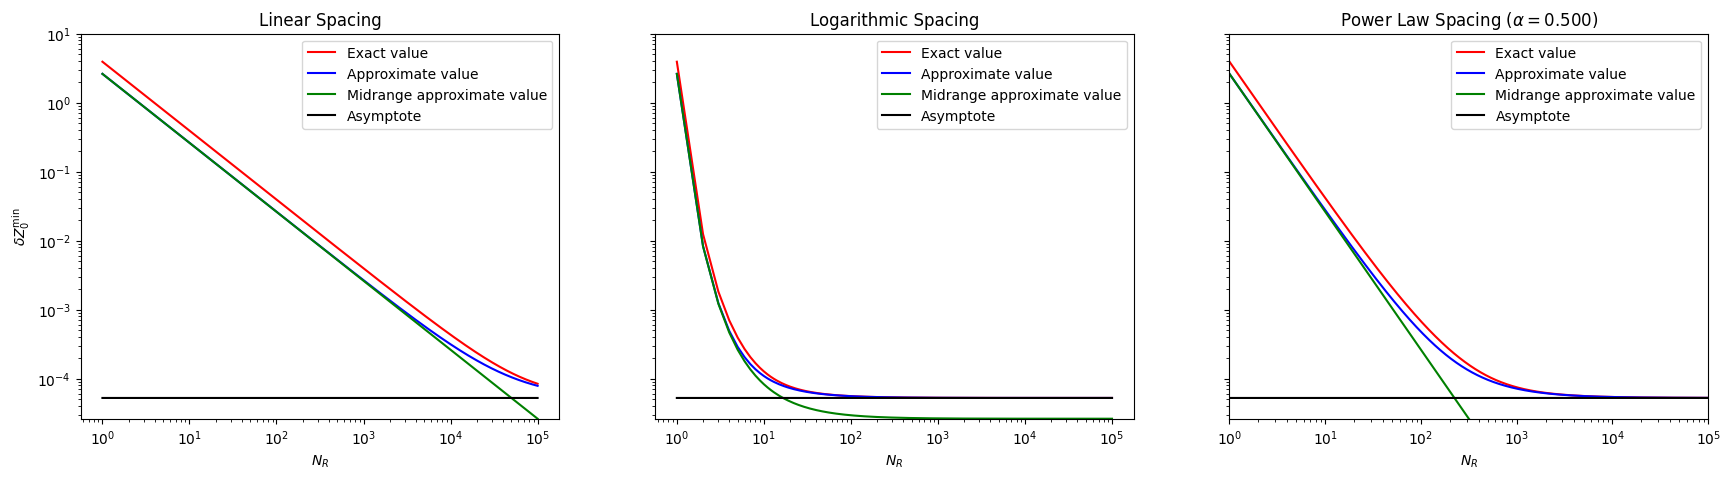

In [15]:
import matplotlib.pyplot as plt
import numpy as np

h = lambda theta: theta     # angular spacing function
h_inv = lambda theta: theta # inverse of angular spacing function

# input parameters
NR_max = int(1e5)
Ntheta = 100
theta_max = np.pi/6.0
R_min = 0.01
R_max = 1000
R_power = 0.5

NR = np.linspace(1, NR_max, num=NR_max, endpoint=True)
    
# return exact and approximate values for dZ_0^mid given any spacing function g (and its inverse g_inv)
def dZ_info(g, g_inv):
    dR = (g(R_max) - g(R_min)) / NR
    Rp = g_inv(g(R_min) + dR)
    Rc0 = 0.75*(Rp**4 - R_min**4)/(Rp**3 - R_min**3)
    dZ0min_exact = Rc0 * np.tan(h_inv(h(theta_max) / Ntheta))
    dZm_approx = 0.5 * theta_max * (g_inv(g(R_min) + dR) + R_min) / Ntheta
    return dZ0min_exact, dZm_approx

# find midrange approximations for each spacing type
def dZ_midrange_approx():
    linear = 0.5 * R_max  * np.tan(h_inv(h(theta_max) / Ntheta)) / NR
    logarithmic = 0.5 * R_min * np.tan(h_inv(h(theta_max) / Ntheta)) * ((R_max/R_min)**(1 / NR))
    power = 0.5 * R_max * np.tan(h_inv(h(theta_max) / Ntheta)) / ((NR) ** (1 / R_power))

    return linear, logarithmic, power

# horizontal asymptote
def asymptote():
    return R_min * np.tan(h_inv(h(theta_max) / Ntheta))

# collect the values 
lin_exact, lin_approx = dZ_info(lambda R: R, lambda R: R)
log_exact, log_approx = dZ_info(lambda R: np.log(R), lambda R: np.exp(R))
pow_exact, pow_approx = dZ_info(lambda R: np.pow(R, R_power), lambda R: np.pow(R, 1/R_power))
mid_lin_approx, mid_log_approx, mid_pow_approx = dZ_midrange_approx()

asyp = asymptote()
asyp_array = np.full(NR_max, asyp)

# create the plots
fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharey=True)
plt.xlim(1,NR_max)
plt.ylim(0.5*asyp, 10)

ax[0].set_title("Linear Spacing")
ax[0].loglog(NR, lin_exact, label="Exact value", color='r')
ax[0].loglog(NR, lin_approx, label="Approximate value", color='b')
ax[0].loglog(NR, mid_lin_approx, label="Midrange approximate value", color='g')
ax[0].loglog(NR, asyp_array, label="Asymptote", color='black')
ax[0].set_xlabel("$N_R$")
ax[0].set_ylabel("$\\delta Z_0^\\text{min}$")
ax[0].legend()

ax[1].set_title("Logarithmic Spacing")
ax[1].loglog(NR, log_exact, label="Exact value", color='r')
ax[1].loglog(NR, log_approx, label="Approximate value", color='b')
ax[1].loglog(NR, mid_log_approx, label="Midrange approximate value", color='g')
ax[1].loglog(NR, asyp_array, label="Asymptote", color='black')
ax[1].set_xlabel("$N_R$")
ax[1].legend()

ax[2].set_title("Power Law Spacing ($\\alpha = %.3f$)"%R_power)
ax[2].loglog(NR, pow_exact, label="Exact value", color='r')
ax[2].loglog(NR, pow_approx, label="Approximate value", color='b')
ax[2].loglog(NR, mid_pow_approx, label="Midrange approximate value", color='g')
ax[2].loglog(NR, asyp_array, label="Asymptote", color='black')
ax[2].set_xlabel("$N_R$")
ax[2].legend()

plt.show()